In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("The number of Features in  train dataset :",train_df.shape[1])
print("The number of Rows in Train dataset :",train_df.shape[0])

The number of Features in  train dataset : 12
The number of Rows in Train dataset : 891


In [5]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)

type_features(train_df)

categorical_features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
numerical_features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


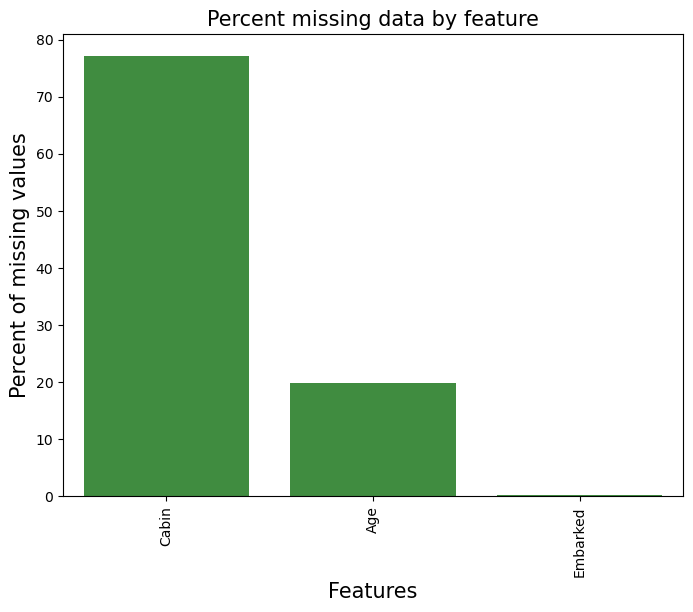

In [6]:
def missingdata(data):
    # Calculate missing values and percentages
    total = data.isnull().sum()
    percent = (data.isnull().sum() / len(data) * 100)
    
    # Create DataFrame with only features that have missing values
    ms = pd.DataFrame({'Total': total, 'Percent': percent})
    ms = ms[ms['Percent'] > 0].sort_values('Percent', ascending=False)
    
    # Create visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(x=ms.index, y='Percent', data=ms, color='green', alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return ms

missingdata(train_df)

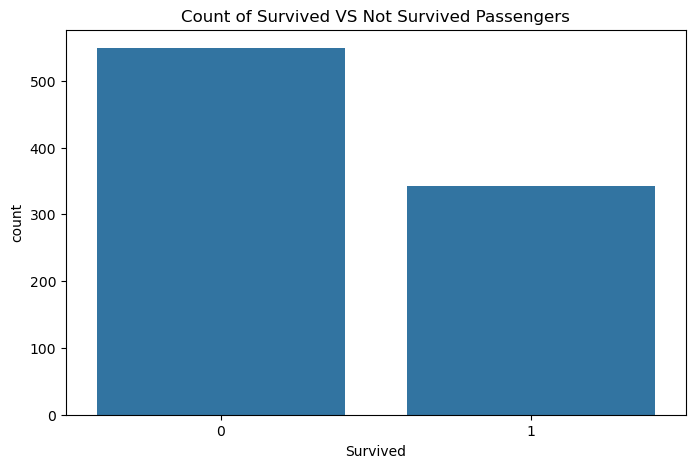

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=train_df)
plt.title('Count of Survived VS Not Survived Passengers')
plt.show()

In [8]:
def group_by(df,t1='',t2=''):
    a1=df.groupby([t1,t2])[t2].count()
    return a1

In [9]:
def plot_re(df, t1='', t2=''):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left subplot: Count of passengers for the selected feature
    df[[t1, t2]].groupby([t1]).count().plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Distribution of Passengers by {t1}')
    axes[0].set_ylabel('Count')
    
    # Right subplot: Survival distribution by the selected feature
    sns.countplot(x=t1, hue=t2, data=df, ax=axes[1])
    axes[1].set_title(f'Survival Distribution by {t1}')
    
    plt.tight_layout()
    plt.show()

In [10]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

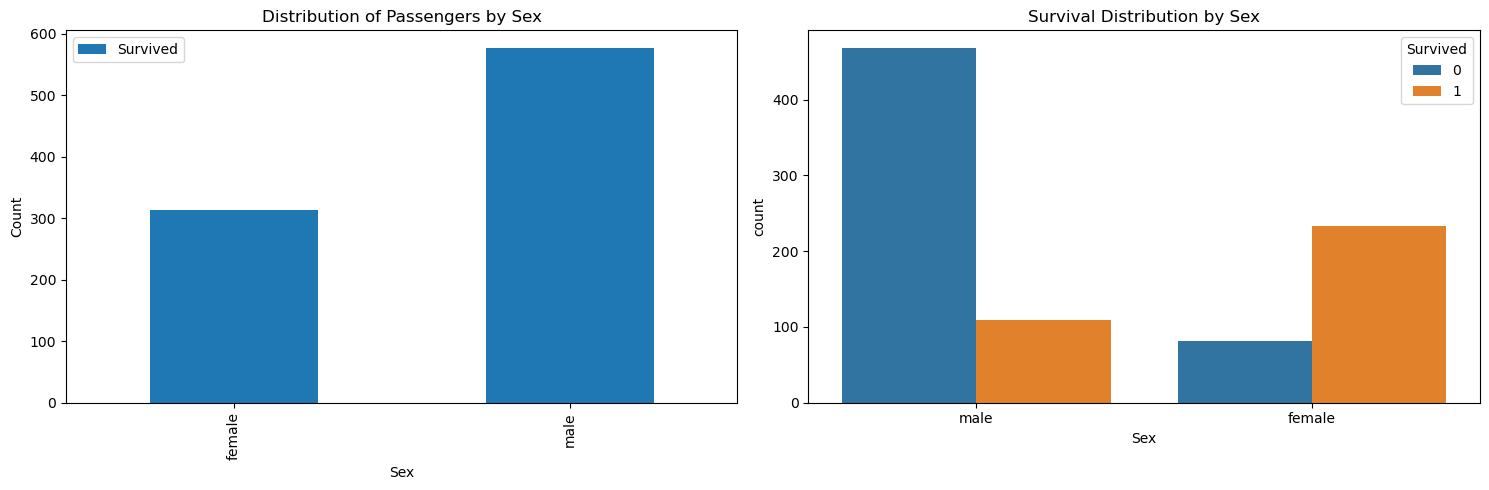

In [11]:
plot_re(train_df,'Sex','Survived')

In [12]:
group_by(train_df,'Sex','Survived')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
train_df['Age_bin'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age_bin, dtype: category
Categories (4, object): ['Children' < 'Teenage' < 'Adult' < 'Elder']

In [14]:
group_by(train_df,'Age_bin','Survived')

Age_bin   Survived
Children  0            29
          1            40
Teenage   0            68
          1            42
Adult     0           232
          1           153
Elder     0            95
          1            55
Name: Survived, dtype: int64

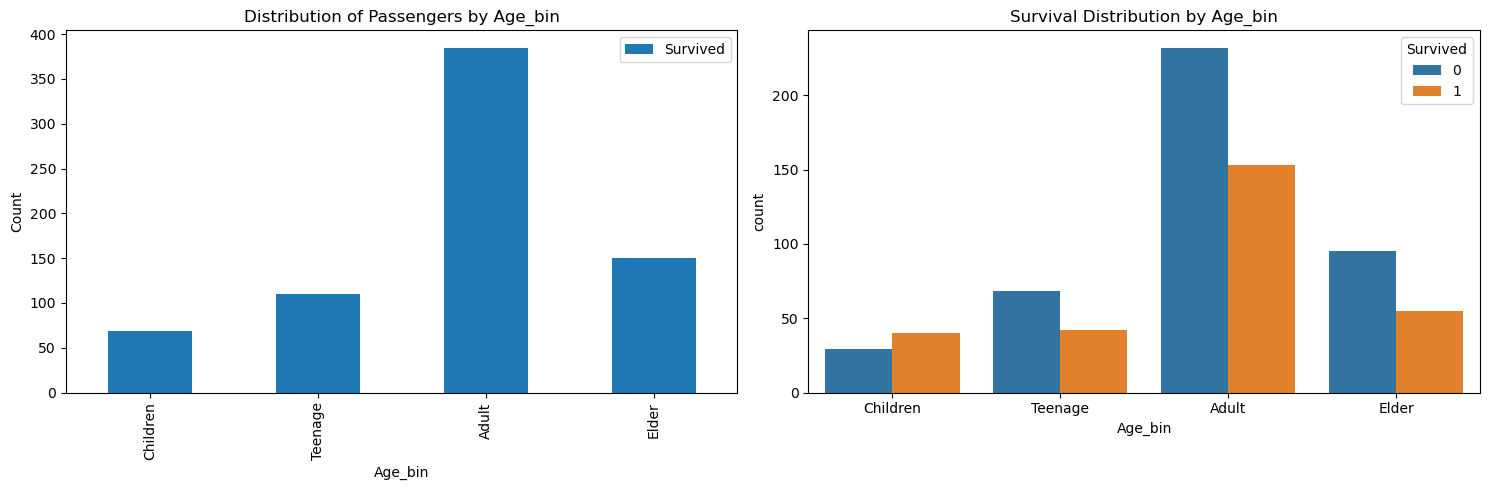

In [15]:
plot_re(train_df,'Age_bin','Survived')

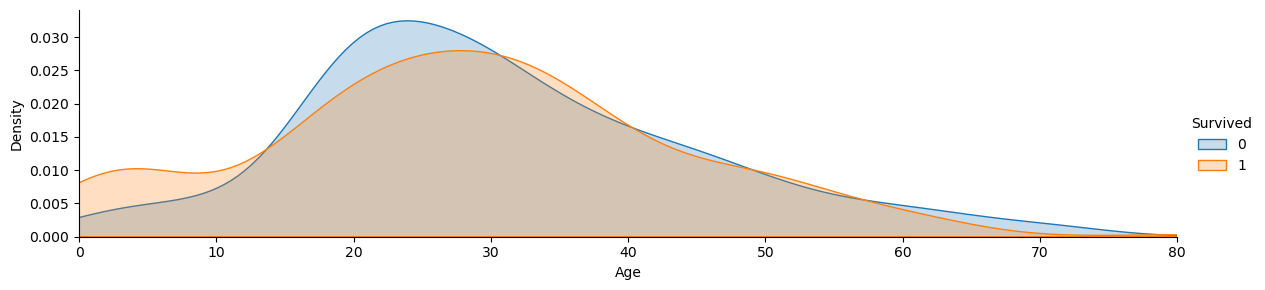

In [16]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

In [17]:
def or_plot(df, t1='', t2=''):
    # Create figure and subplots
    f, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    # Left subplot: Value counts
    df[t1].value_counts().plot.bar(ax=ax[0], color='green')
    ax[0].set_title(f'Number of Passengers by {t1}')
    ax[0].set_xlabel(f'{t1}')
    ax[0].set_ylabel('Count')
    
    # Right subplot: Survival distribution
    sns.countplot(x=t1, hue=t2, data=df, ax=ax[1], palette='spring')
    ax[1].set_title(f'{t1}: Survived vs Dead')
    
    plt.tight_layout()
    plt.show()

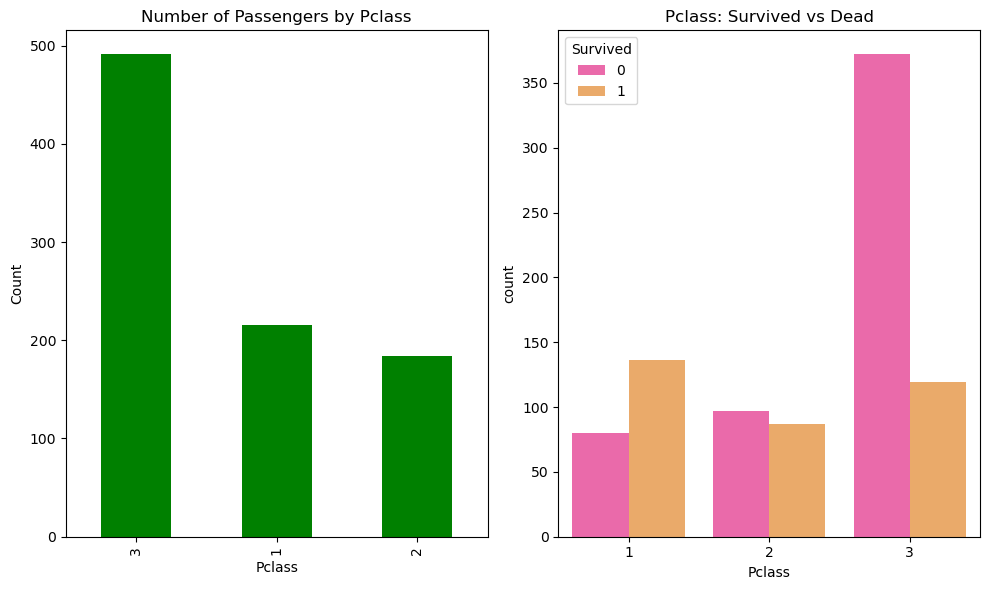

In [18]:
or_plot(train_df,'Pclass','Survived')

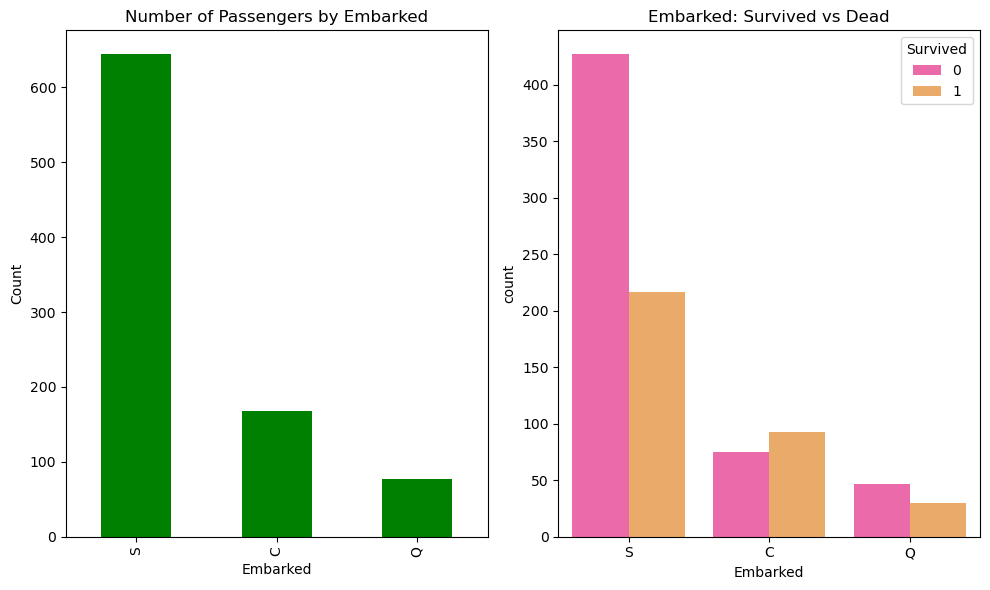

In [19]:
or_plot(train_df,'Embarked','Survived')

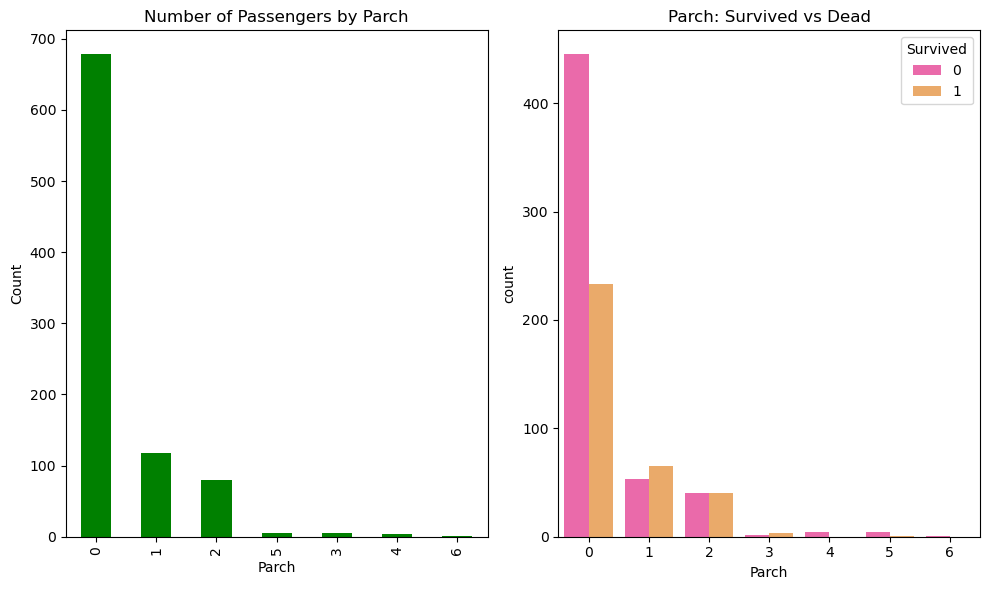

In [20]:
or_plot(train_df,'Parch','Survived')

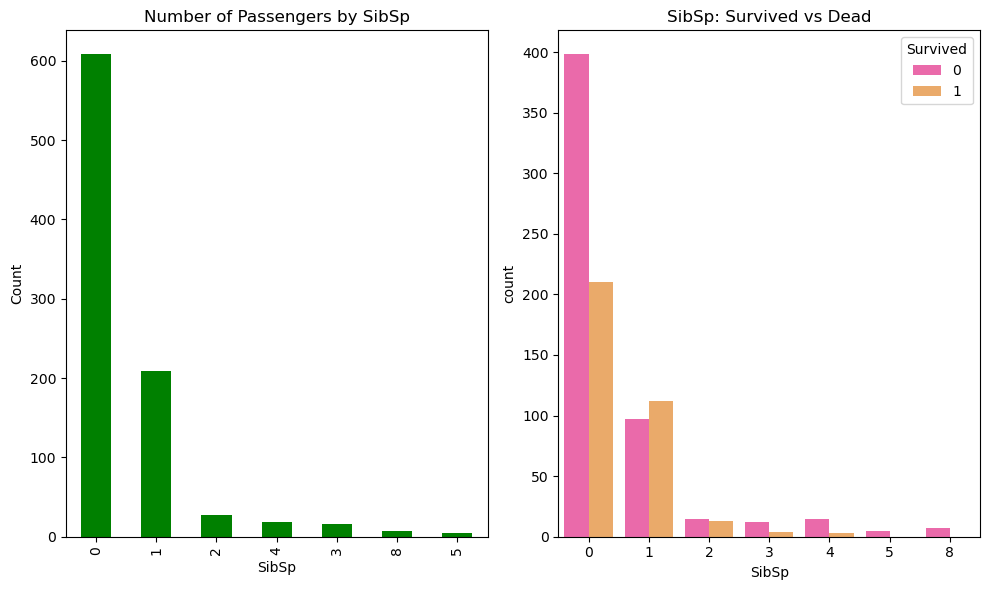

In [21]:
or_plot(train_df,'SibSp','Survived')

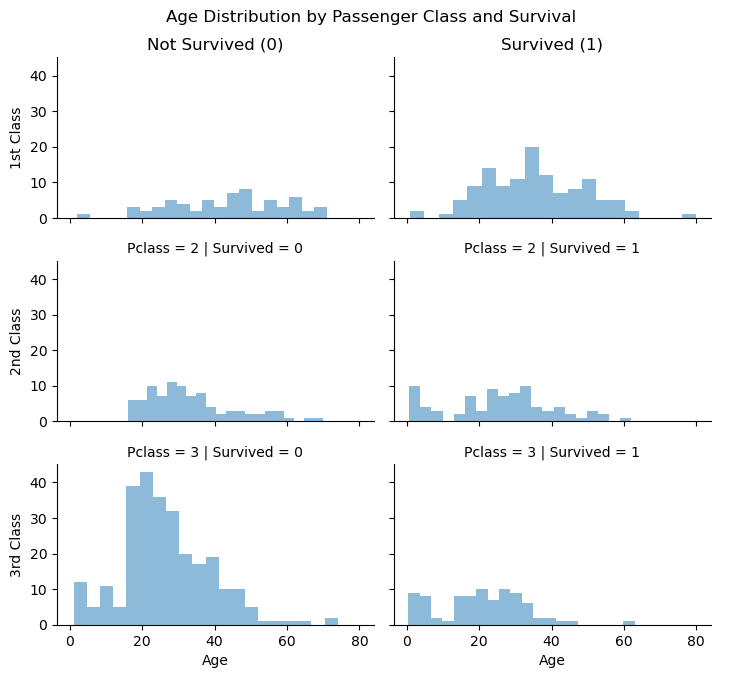

In [22]:
# Create FacetGrid with Age distribution by Survival status and Passenger Class
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.fig.suptitle('Age Distribution by Passenger Class and Survival', y=1.02)

# Add labels for Survived column
grid.axes[0,0].set_title('Not Survived (0)')
grid.axes[0,1].set_title('Survived (1)')

# Add row labels for Pclass
grid.axes[0,0].set_ylabel('1st Class')
grid.axes[1,0].set_ylabel('2nd Class')
grid.axes[2,0].set_ylabel('3rd Class')

grid.add_legend()

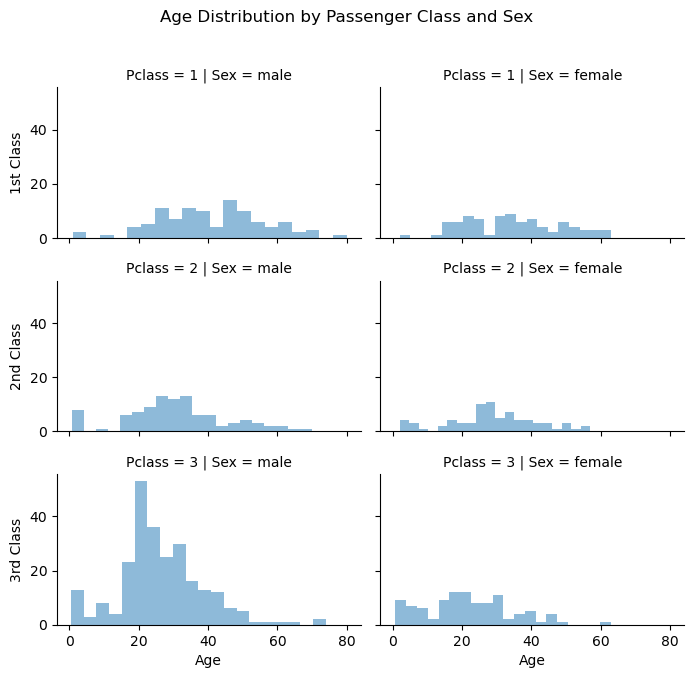

In [23]:
# Create FacetGrid showing Age distribution by Passenger Class and Sex
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.fig.suptitle('Age Distribution by Passenger Class and Sex', y=1.02)

# Add row labels for Pclass
grid.axes[0,0].set_ylabel('1st Class')
grid.axes[1,0].set_ylabel('2nd Class')
grid.axes[2,0].set_ylabel('3rd Class')

plt.tight_layout()

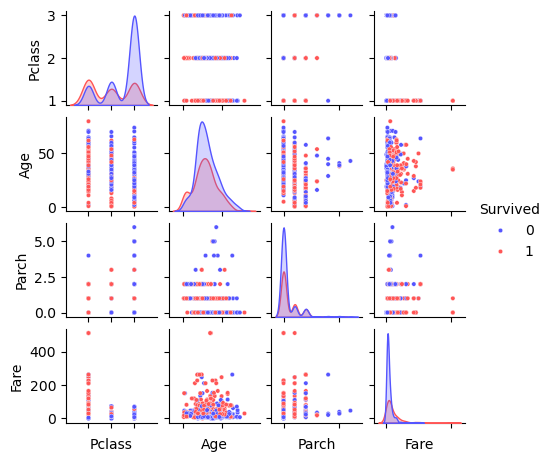

In [24]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
        ]], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

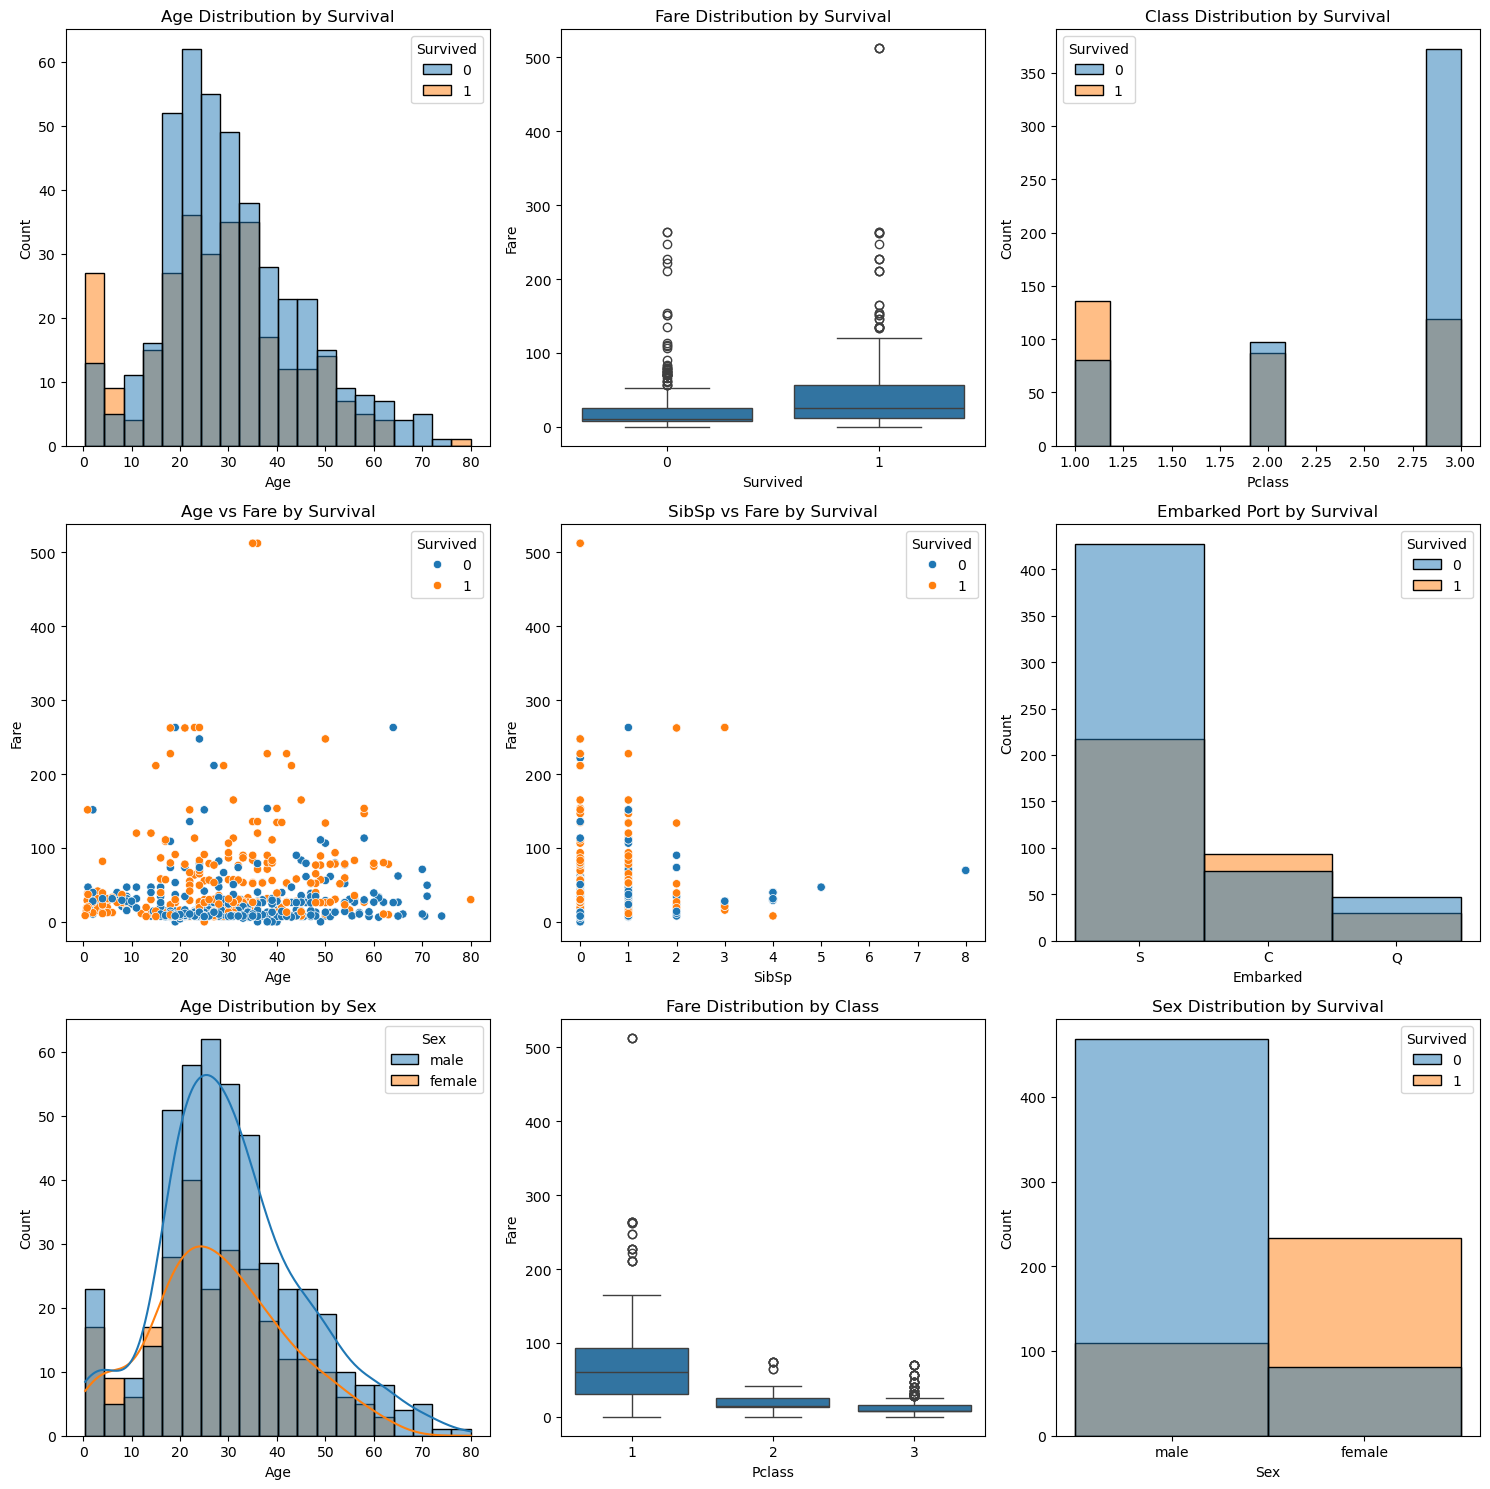

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Age distribution by survival
sns.histplot(x='Age', hue='Survived', data=train_df, ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Survival')

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=train_df, ax=axes[0,1])
axes[0,1].set_title('Fare Distribution by Survival')

# Pclass vs Survival
sns.histplot(x='Pclass', hue='Survived', data=train_df, ax=axes[0,2])
axes[0,2].set_title('Class Distribution by Survival')

# Age vs Fare with Survival
sns.scatterplot(x='Age', y='Fare', data=train_df, hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Age vs Fare by Survival')

# SibSp vs Fare with Survival
sns.scatterplot(x='SibSp', y='Fare', hue='Survived', data=train_df, ax=axes[1,1])
axes[1,1].set_title('SibSp vs Fare by Survival')

# Embarked by Survival
sns.histplot(x='Embarked', hue='Survived', data=train_df, ax=axes[1,2])
axes[1,2].set_title('Embarked Port by Survival')

# Age distribution by Sex
sns.histplot(x='Age', hue='Sex', data=train_df, kde=True, ax=axes[2,0])
axes[2,0].set_title('Age Distribution by Sex')

# Fare distribution by Pclass
sns.boxplot(x='Pclass', y='Fare', data=train_df, ax=axes[2,1])
axes[2,1].set_title('Fare Distribution by Class')

# Sex distribution by Survival
sns.histplot(x='Sex', hue='Survived', data=train_df, ax=axes[2,2])
axes[2,2].set_title('Sex Distribution by Survival')

plt.tight_layout()
plt.show()

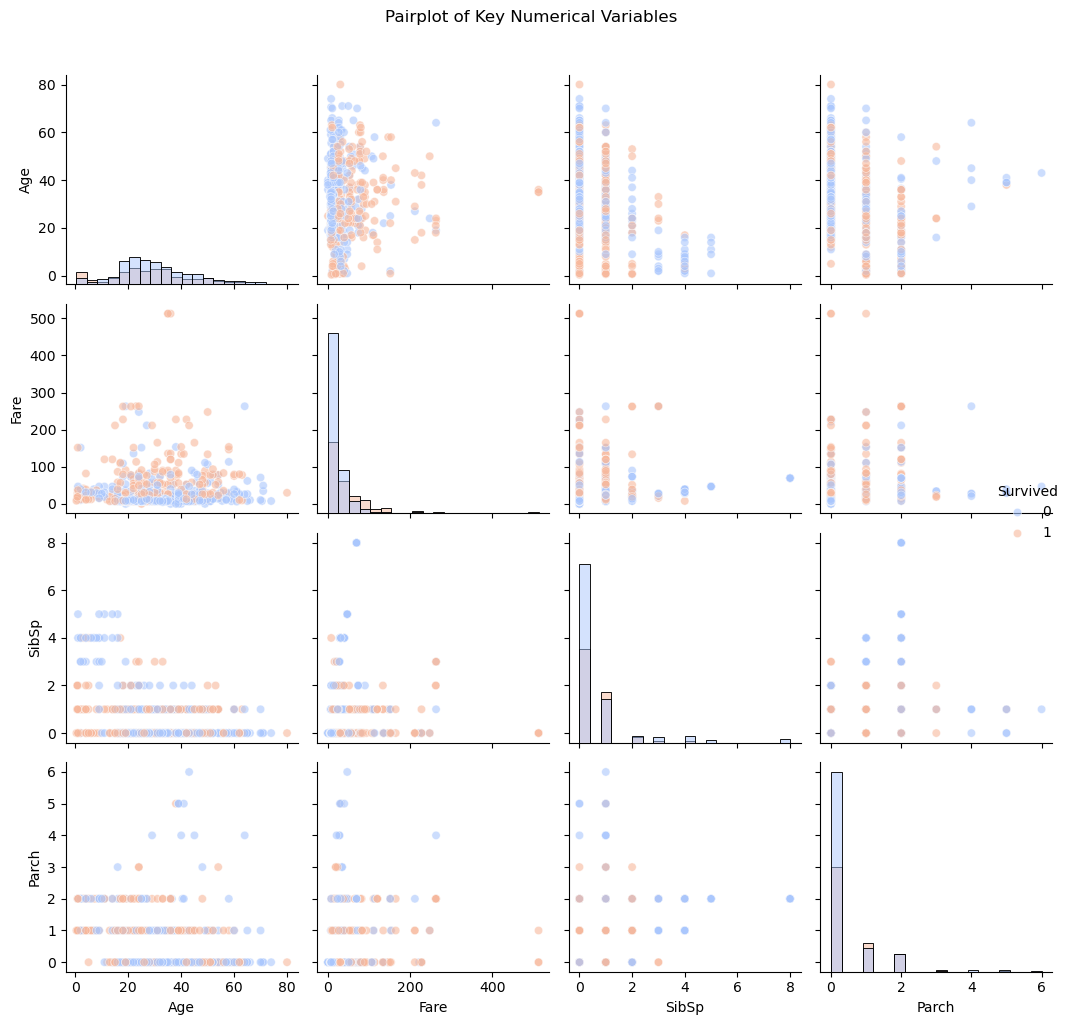

In [28]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], 
             diag_kind='hist',
             hue='Survived',
             palette='coolwarm',
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 20})
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.tight_layout()